In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [92]:
total =datasets.load_iris()
data = [ 0 for i in range(3)]
target = [0 for i in range(3)]
for i in range(3):
    data[i] = total.data[i*50:(i+1)*50,:3] 
    target[i]= total.data[i*50:(i+1)*50,3:4] 

In [96]:
averMSE = [[] for i in range(3)]
for c in range(3):  #class
    for k in range(1,16,2): # 'k' - NN
        mse = [  ]
        for i in range(10): #10 times
            trainData,testData,trainTarget,testTarget = train_test_split(data[c],target[c],test_size= 0.7)
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(trainData,trainTarget)
            predict = knn.predict(testData)
            mse.append( mean_squared_error(testTarget,predict))
        averMSE[c].append(np.mean(mse))

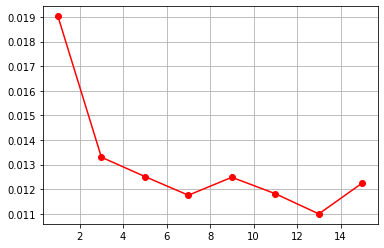

In [126]:
plt.grid()
plt.plot(range(1,16,2),averMSE[0],'ro-')
plt.savefig('2-1')

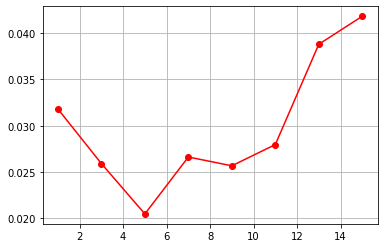

In [125]:
plt.grid()
plt.plot(range(1,16,2),averMSE[1],'ro-')
plt.savefig('2-2')

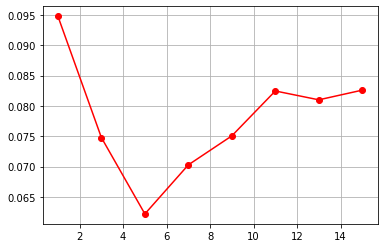

In [127]:
plt.grid()
plt.plot(range(1,16,2),averMSE[2],'ro-')
plt.savefig('2-3')